In [2]:
import numpy as np 
import random, os
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [2]:
weather_path = r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_1_.csv'
save_path = r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\savedData\CAISO_zone_1_.csv'

In [3]:
data = pd.read_csv(weather_path, delimiter = ',')

In [6]:
print(data.iloc[0])

time                  2018-01-01 00:00:00
load_power                       0.785327
wind_power                       0.004276
solar_power                           0.0
DHI                                   0.0
DNI                                   0.0
GHI                                   0.0
Dew Point                            -7.7
Solar Zenith Angle                 168.88
Wind Speed                            1.2
Relative Humidity                   23.78
Temperature                          12.5
Name: 0, dtype: object


In [2]:
energy_path = r'C:\Users\super\Downloads\eia8602019\3_3_Solar_Y2019.csv'
energy_PP_data = pd.read_csv(energy_path, delimiter = ',', skiprows=[0])

In [11]:
energy_PP_data.head()

,Utility ID,Utility Name,Plant Code,Plant Name,State,County,Generator ID,Status,Technology,Prime Mover,...,Crystalline Silicon?,Thin-Film (CdTe)?,Thin-Film (A-Si)?,Thin-Film (CIGS)?,Thin-Film (Other)?,Other Materials?,Net Metering Agreement?,Net Metering DC Capacity (MW),Virtual Net Metering Agreement?,Virtual Net Metering DC Capacity (MW)
0,16572,Salt River Project,141,Agua Fria,AZ,Maricopa,PV-3,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,N,,N,
1,18454,Tampa Electric Co,645,Big Bend,FL,Hillsborough,1,OP,Solar Photovoltaic,PV,...,NaN,Y,NaN,NaN,NaN,NaN,N,,N,
2,7095,City of Geneseo - (IL),944,Geneseo,IL,Henry,12,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,N,,N,
3,16179,Rochelle Municipal Utilities,960,North Ninth Street,IL,Ogle,SOL1,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,Y,0.3,N,
4,14201,City of Osage - (IA),1172,Osage (IA),IA,Mitchell,SO,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,N,,N,


In [3]:
CAISO_energy_PP_data = energy_PP_data[energy_PP_data['State'] == 'CA']
CAISO_energy_PP_data.head()

,Utility ID,Utility Name,Plant Code,Plant Name,State,County,Generator ID,Status,Technology,Prime Mover,...,Crystalline Silicon?,Thin-Film (CdTe)?,Thin-Film (A-Si)?,Thin-Film (CIGS)?,Thin-Film (Other)?,Other Materials?,Net Metering Agreement?,Net Metering DC Capacity (MW),Virtual Net Metering Agreement?,Virtual Net Metering DC Capacity (MW)
17,60246,"Sunray Energy 2, LLC",10437,Sunray 2,CA,San Bernardino,SUN2,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,N,,N,
18,60247,Sunray Energy 3 LLC,10438,Sunray 3,CA,San Bernardino,SUN3,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,N,,N,
19,55711,FPL Energy Operating Services Inc - SEGS,10439,SEGS III,CA,San Bernardino,GEN1,OS,Solar Thermal without Energy Storage,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,X,,X,
20,55711,FPL Energy Operating Services Inc - SEGS,10440,SEGS IV,CA,San Bernardino,GEN1,OS,Solar Thermal without Energy Storage,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,X,,X,
21,55711,FPL Energy Operating Services Inc - SEGS,10441,SEGS V,CA,San Bernardino,GEN1,OS,Solar Thermal without Energy Storage,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,X,,X,


In [5]:
CAISO_total_capacity = CAISO_energy_PP_data['Nameplate Capacity (MW)'].sum()
print(CAISO_total_capacity)

12795.400000000001


In [34]:
import pandas as pd

# Paths to the CSV files
file_paths = [
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_1_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_2_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_3_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_4_.csv'
]

# Read the CSV files into DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Ensure all DataFrames have the same columns and are aligned by index
for df in dfs:
    df.set_index('time', inplace=True)

# Concatenate the DataFrames along the columns
combined_df = pd.concat(dfs, axis=1)

# Calculate the mean for each row across the DataFrames
mean_df = combined_df.groupby(combined_df.columns, axis=1).mean()

# Reset the index to make 'time' a column again
mean_df.reset_index(inplace=True)

# Save the combined DataFrame to a new CSV file
mean_df.to_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_combined_mean.csv', index=False)


C:\Users\super\AppData\Local\Temp\ipykernel_7688\3686384384.py:22: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_df = combined_df.groupby(combined_df.columns, axis=1).mean()


                  time  DHI  DNI  Dew Point  GHI  Relative Humidity  \
0  2018-01-01 00:00:00  0.0  0.0      1.175  0.0              56.54   
1  2018-01-01 00:01:00  0.0  0.0      1.180  0.0              56.54   
2  2018-01-01 00:02:00  0.0  0.0      1.185  0.0              56.54   
3  2018-01-01 00:03:00  0.0  0.0      1.190  0.0              56.54   
4  2018-01-01 00:04:00  0.0  0.0      1.195  0.0              56.54   

   Solar Zenith Angle  Temperature  Wind Speed  load_power  solar_power  \
0            167.5675       11.125       1.175    0.873470          0.0   
1            167.5520       11.130       1.175    0.873133          0.0   
2            167.5365       11.135       1.175    0.872795          0.0   
3            167.5210       11.140       1.175    0.872457          0.0   
4            167.5055       11.145       1.175    0.872120          0.0   

   wind_power  
0    0.005142  
1    0.005093  
2    0.005045  
3    0.004997  
4    0.004948  


In [7]:
mean_df = pd.read_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_combined_mean.csv', delimiter = ',', skiprows=[0])


In [8]:
mean_df.head()

,2018-01-01 00:00:00,0.0,0.0.1,1.1750000000000003,0.0.2,56.54,167.5675,11.125,1.175,0.8734703273625303,0.0.3,0.0051417567921903246
0,2018-01-01 00:01:00,0.0,0.0,1.180,0.0,56.54,167.5520,11.130,1.175,0.873133,0.0,0.005093
1,2018-01-01 00:02:00,0.0,0.0,1.185,0.0,56.54,167.5365,11.135,1.175,0.872795,0.0,0.005045
2,2018-01-01 00:03:00,0.0,0.0,1.190,0.0,56.54,167.5210,11.140,1.175,0.872457,0.0,0.004997
3,2018-01-01 00:04:00,0.0,0.0,1.195,0.0,56.54,167.5055,11.145,1.175,0.872120,0.0,0.004948
4,2018-01-01 00:05:00,0.0,0.0,1.200,0.0,56.54,167.4900,11.150,1.175,0.871782,0.0,0.004900


In [7]:
attributes= ["time", "solar_power", "GHI", "DHI", "DNI", "Solar Zenith Angle", "wind_power", "load_power", "Temperature", "Relative Humidity", "Wind Speed"]
date_format = '%Y-%m-%d %H:%M:%S'
df = pd.DataFrame(mean_df[attributes])
df['time'] = pd.to_datetime(df['time'], format=date_format)

NameError: name 'mean_df' is not defined

In [6]:
for attribute in attributes:
    if( attribute == 'time'):
        continue
    plt.figure(figsize=(20,10))
    plt.plot(df[attribute], label=attribute)
    plt.title(attribute)

NameError: name 'attributes' is not defined

In [13]:
import pandas as pd

# Paths to the CSV files
file_paths = [
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\MISO_zone_1_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\MISO_zone_2_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\MISO_zone_3_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\MISO_zone_4_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\MISO_zone_5_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\MISO_zone_6_.csv'
]

# Read the CSV files into DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Ensure all DataFrames have the same columns and are aligned by index
for df in dfs:
    df.set_index('time', inplace=True)

# Concatenate the DataFrames along the columns
combined_df = pd.concat(dfs, axis=1)

# Calculate the mean for each row across the DataFrames
MISO_mean_df = combined_df.groupby(combined_df.columns, axis=1).mean()

# Reset the index to make 'time' a column again
MISO_mean_df.reset_index(inplace=True)

# Save the combined DataFrame to a new CSV file
MISO_mean_df.to_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\MISO_combined_mean.csv', index=False)

C:\Users\super\AppData\Local\Temp\ipykernel_20584\1226364017.py:24: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  MISO_mean_df = combined_df.groupby(combined_df.columns, axis=1).mean()


In [15]:

# Paths to the CSV files


# Ensure all DataFrames have the same columns and are aligned by index
for df in dfs:
    df.set_index('time', inplace=True)

# Concatenate the DataFrames along the columns
combined_df = pd.concat(dfs, axis=1)

# Calculate the mean for each row across the DataFrames
ERCOT_mean_df = combined_df.groupby(combined_df.columns, axis = 1).mean()

# Reset the index to make 'time' a column again
ERCOT_mean_df.reset_index(inplace=True)

# Save the combined DataFrame to a new CSV file
ERCOT_mean_df.to_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\ERCOT_combined_mean.csv', index=False)file_paths = [
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\ERCOT_zone_1_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\ERCOT_zone_2_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\ERCOT_zone_3_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\ERCOT_zone_4_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\ERCOT_zone_5_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\ERCOT_zone_6_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\ERCOT_zone_7_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\ERCOT_zone_8_.csv'
]

# Read the CSV files into DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

C:\Users\super\AppData\Local\Temp\ipykernel_20584\370134979.py:24: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  ERCOT_mean_df = combined_df.groupby(combined_df.columns, axis = 1).mean()


In [17]:
# Paths to the CSV files
file_paths = [
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_1_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_2_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_3_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_4_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_5_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_6_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_7_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_8_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_9_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_10_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_11_.csv'
]

# Read the CSV files into DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Ensure all DataFrames have the same columns and are aligned by index
for df in dfs:
    df.set_index('time', inplace=True)

# Concatenate the DataFrames along the columns
combined_df = pd.concat(dfs, axis=1)

# Calculate the mean for each row across the DataFrames
NYISO_mean_df = combined_df.groupby(combined_df.columns, axis = 1).mean()

# Reset the index to make 'time' a column again
NYISO_mean_df.reset_index(inplace=True)

# Save the combined DataFrame to a new CSV file
NYISO_mean_df.to_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_combined_mean.csv', index=False)

C:\Users\super\AppData\Local\Temp\ipykernel_20584\3944738942.py:27: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  NYISO_mean_df = combined_df.groupby(combined_df.columns, axis = 1).mean()


In [18]:
# Paths to the CSV files
file_paths = [
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_1_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_2_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_3_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_4_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_5_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_6_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_7_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_8_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_9_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_10_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_11_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_12_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_13_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_14_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_15_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_16_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_17_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_18_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_19_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_zone_20_.csv'
]

# Read the CSV files into DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Ensure all DataFrames have the same columns and are aligned by index
for df in dfs:
    df.set_index('time', inplace=True)

# Concatenate the DataFrames along the columns
combined_df = pd.concat(dfs, axis=1)

# Calculate the mean for each row across the DataFrames
PJM_mean_df = combined_df.groupby(combined_df.columns, axis = 1).mean()

# Reset the index to make 'time' a column again
PJM_mean_df.reset_index(inplace=True)

# Save the combined DataFrame to a new CSV file
PJM_mean_df.to_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_combined_mean.csv', index=False)

C:\Users\super\AppData\Local\Temp\ipykernel_20584\3367847457.py:36: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  PJM_mean_df = combined_df.groupby(combined_df.columns, axis = 1).mean()


In [19]:
# Paths to the CSV files
file_paths = [
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_1_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_2_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_3_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_4_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_5_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_6_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_7_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_8_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_9_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_10_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_11_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_12_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_13_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_14_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_15_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_16_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_zone_17_.csv'
]

# Read the CSV files into DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Ensure all DataFrames have the same columns and are aligned by index
for df in dfs:
    df.set_index('time', inplace=True)

# Concatenate the DataFrames along the columns
combined_df = pd.concat(dfs, axis=1)

# Calculate the mean for each row across the DataFrames
SPP_mean_df = combined_df.groupby(combined_df.columns, axis = 1).mean()

# Reset the index to make 'time' a column again
SPP_mean_df.reset_index(inplace=True)

# Save the combined DataFrame to a new CSV file
SPP_mean_df.to_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_combined_mean.csv', index=False)

C:\Users\super\AppData\Local\Temp\ipykernel_20584\2419369558.py:33: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  SPP_mean_df = combined_df.groupby(combined_df.columns, axis = 1).mean()


In [7]:
# SPP_mean_df = pd.read_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\SPP_combined_mean.csv', delimiter = ',')
# NYISO_mean_df = pd.read_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_combined_mean.csv', delimiter = ',')
# PJM_mean_df = pd.read_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\PJM_combined_mean.csv', delimiter = ',')
# ERCOT_mean_df = pd.read_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\ERCOT_combined_mean.csv', delimiter = ',')
# MISO_mean_df = pd.read_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\MISO_combined_mean.csv', delimiter = ',')
CAISO_mean_df = pd.read_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_combined_mean.csv', delimiter = ',')

In [8]:

attributes= ["time", "solar_power", "GHI", "DHI", "DNI"]
date_format = '%Y-%m-%d %H:%M:%S'

In [6]:
SPP_df = pd.DataFrame(SPP_mean_df[attributes])
SPP_df['time'] = pd.to_datetime(SPP_df['time'], format=date_format)

NameError: name 'SPP_mean_df' is not defined

In [20]:
NYISO_df = pd.DataFrame(NYISO_mean_df[attributes])
NYISO_df['time'] = pd.to_datetime(NYISO_df['time'], format=date_format)

In [21]:
PJM_df = pd.DataFrame(PJM_mean_df[attributes])
PJM_df['time'] = pd.to_datetime(PJM_df['time'], format=date_format)

In [22]:

ERCOT_df = pd.DataFrame(ERCOT_mean_df[attributes])
ERCOT_df['time'] = pd.to_datetime(ERCOT_df['time'], format=date_format)

In [23]:
MISO_df = pd.DataFrame(MISO_mean_df[attributes])
MISO_df['time'] = pd.to_datetime(MISO_df['time'], format=date_format)

In [9]:
CAISO_df = pd.DataFrame(CAISO_mean_df[attributes])
CAISO_df['time'] = pd.to_datetime(CAISO_df['time'], format=date_format)

In [12]:
attributes= ["solar_power", "GHI"]
def plot_attribute(df, attributes,datasetName):
    print(datasetName)
    for attribute in attributes:
        if( attribute == 'time'):
            continue  
        plt.figure(figsize=(20,10))
        plt.plot(df[attribute], label=attribute)
        plt.title(attribute)
    

SPP
NYISO
PJM
ERCOT
MISO
CAISO


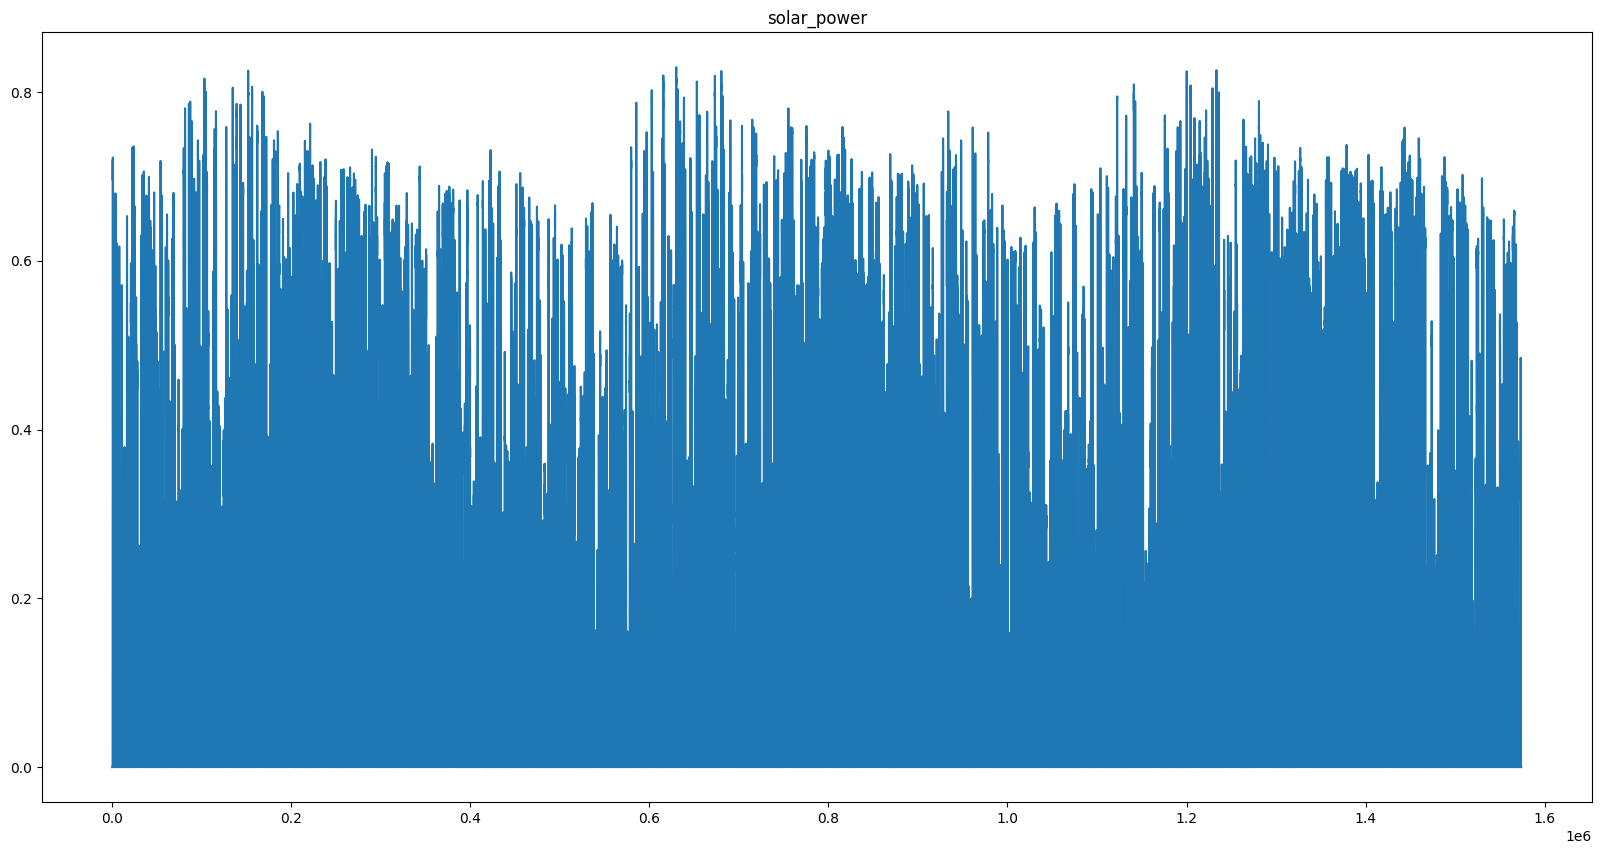

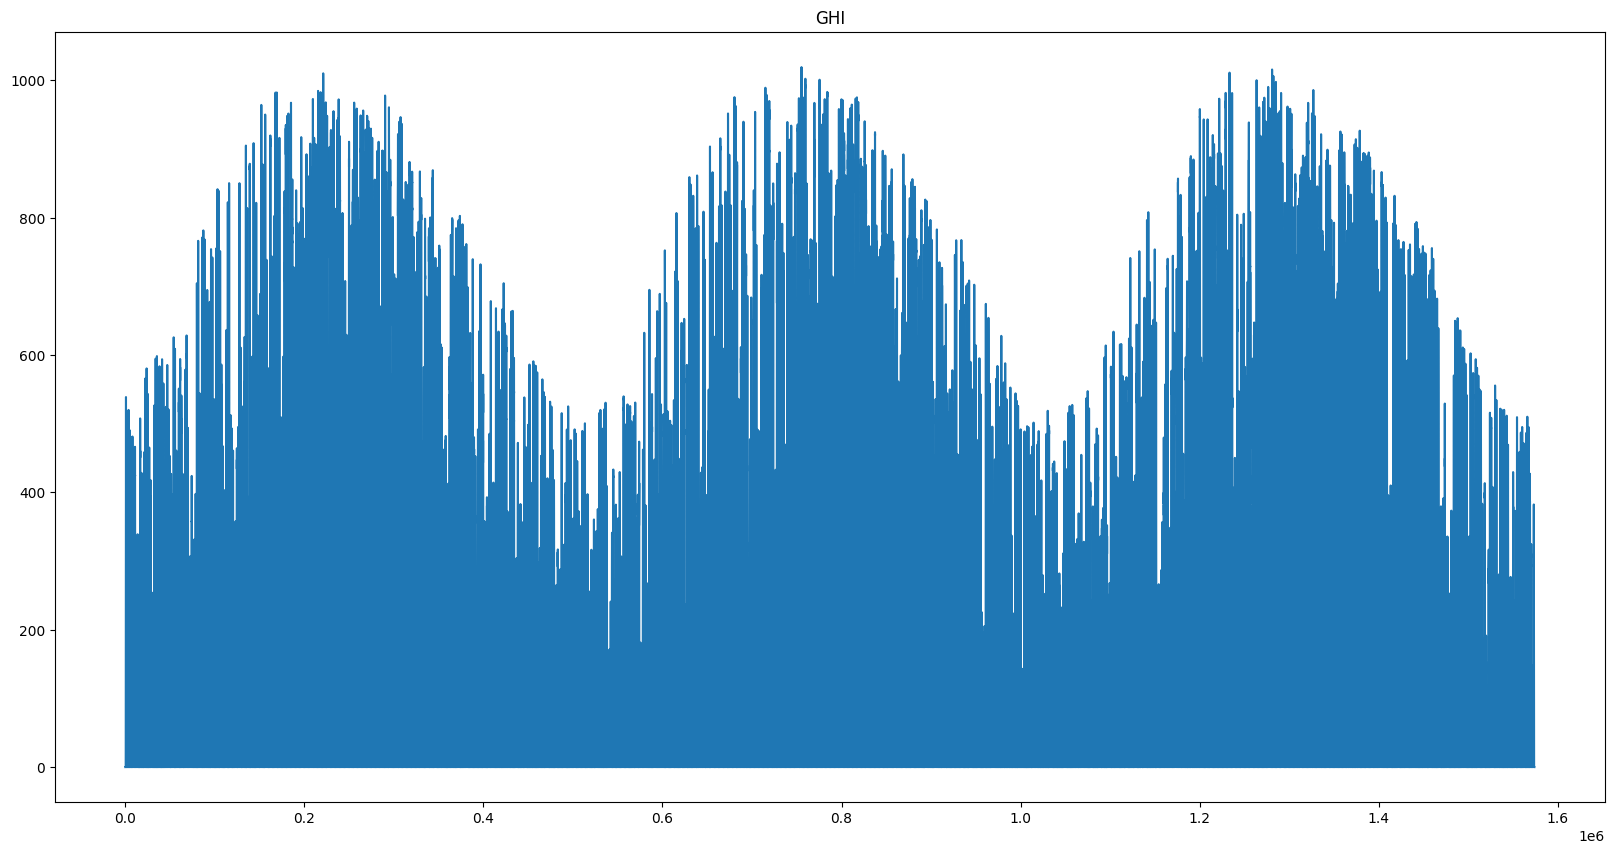

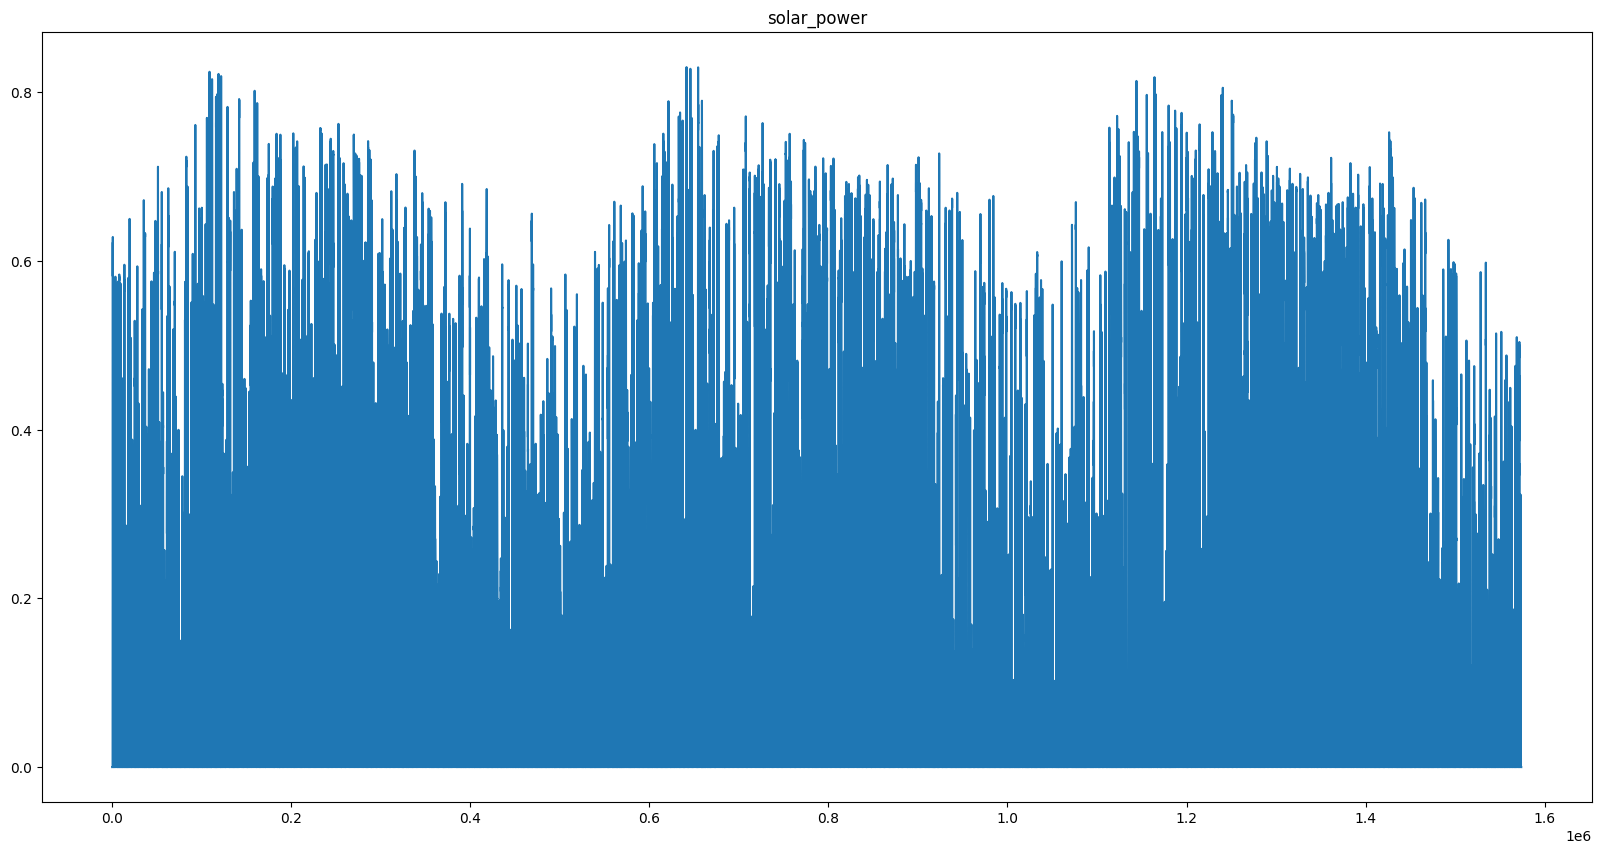

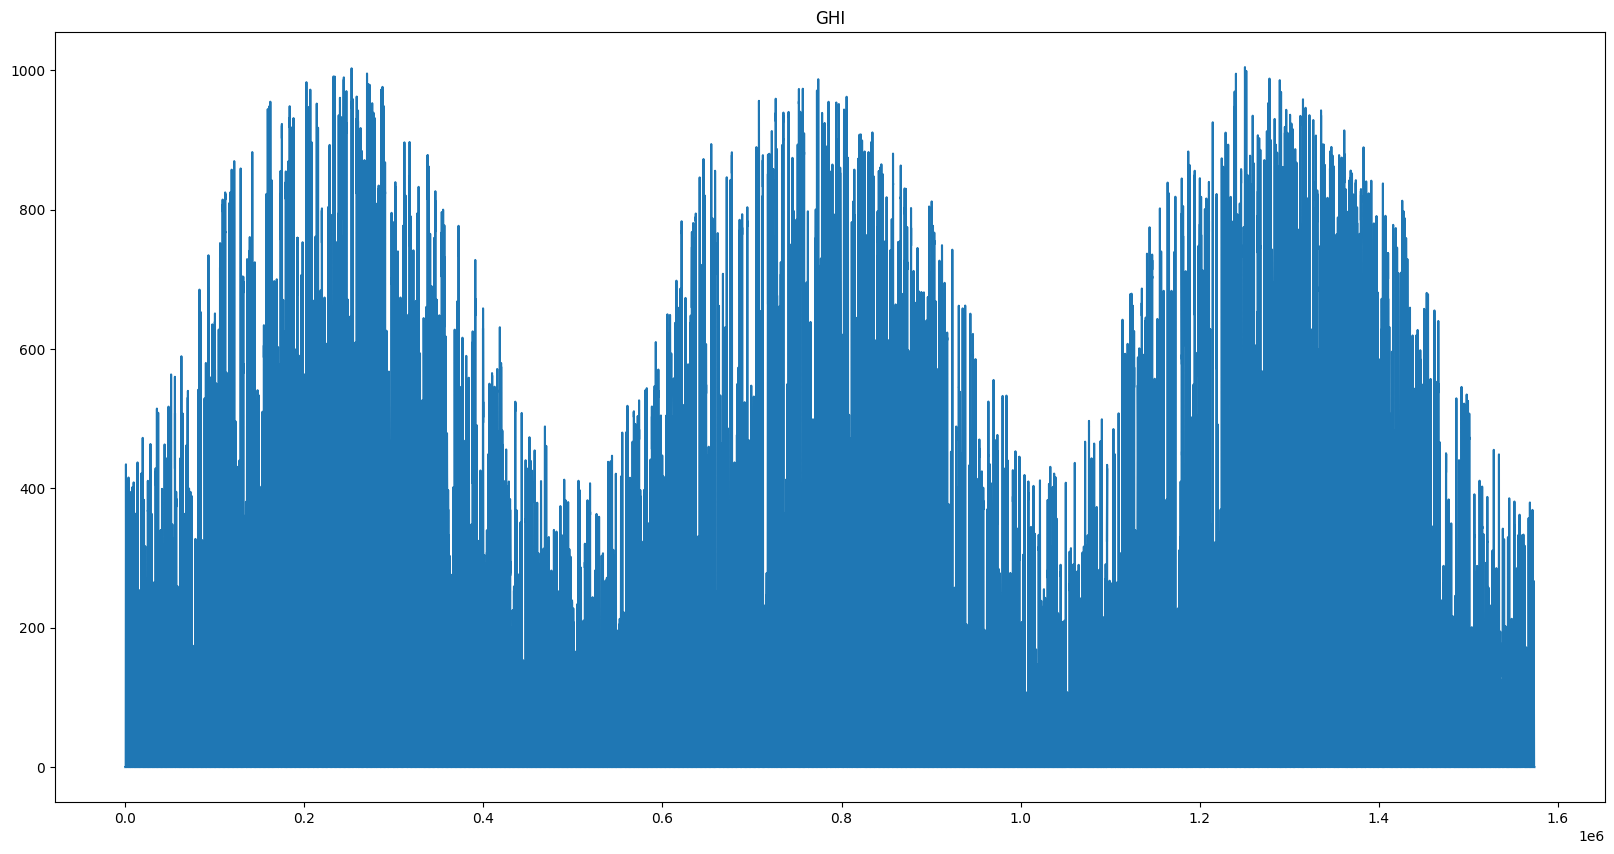

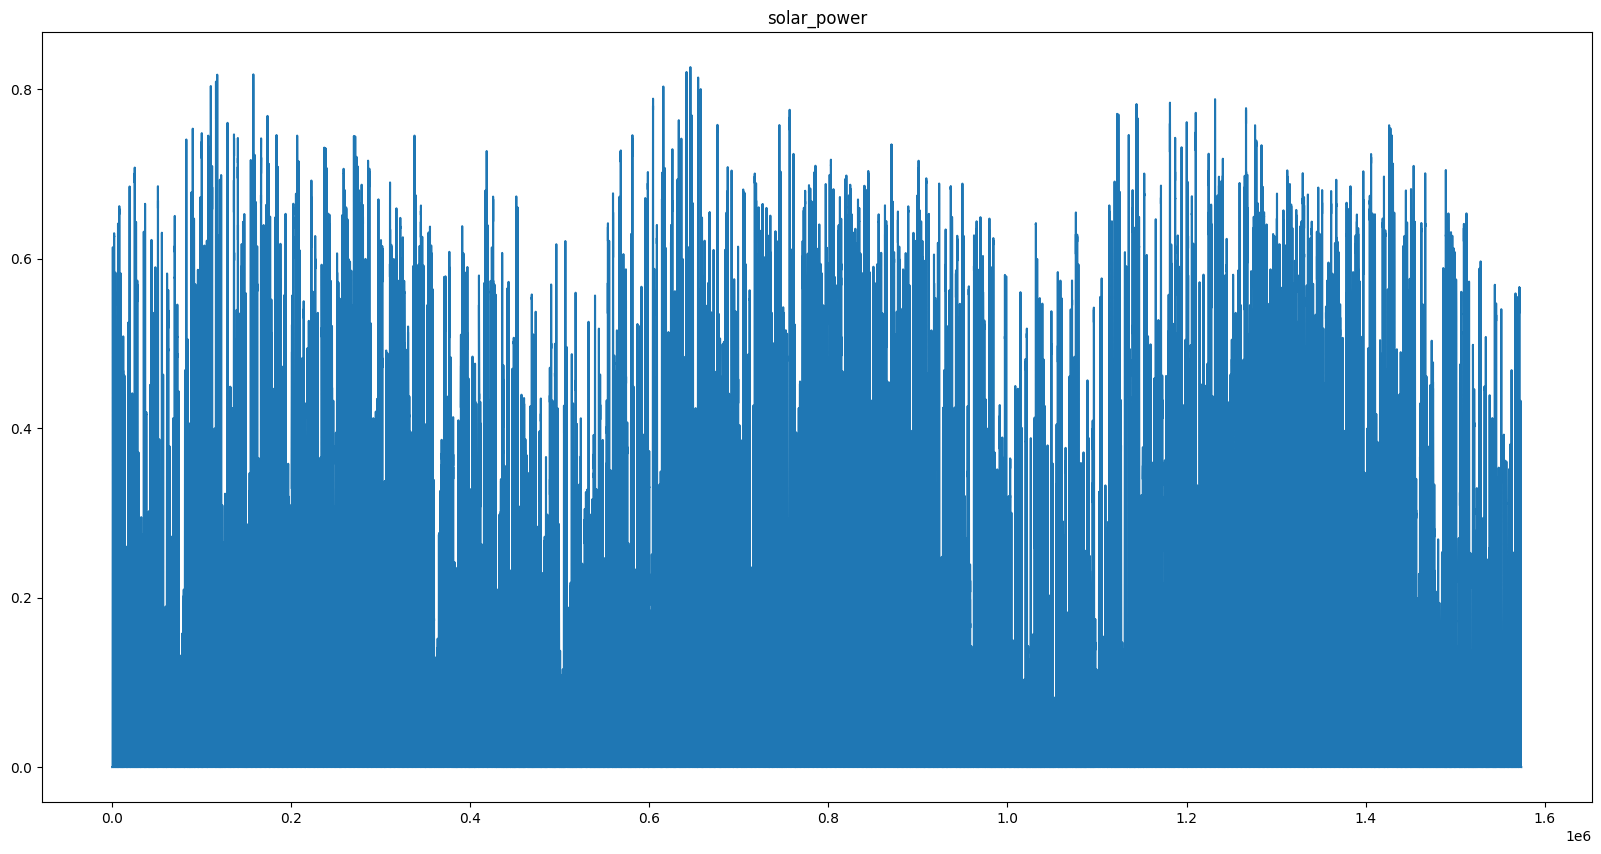

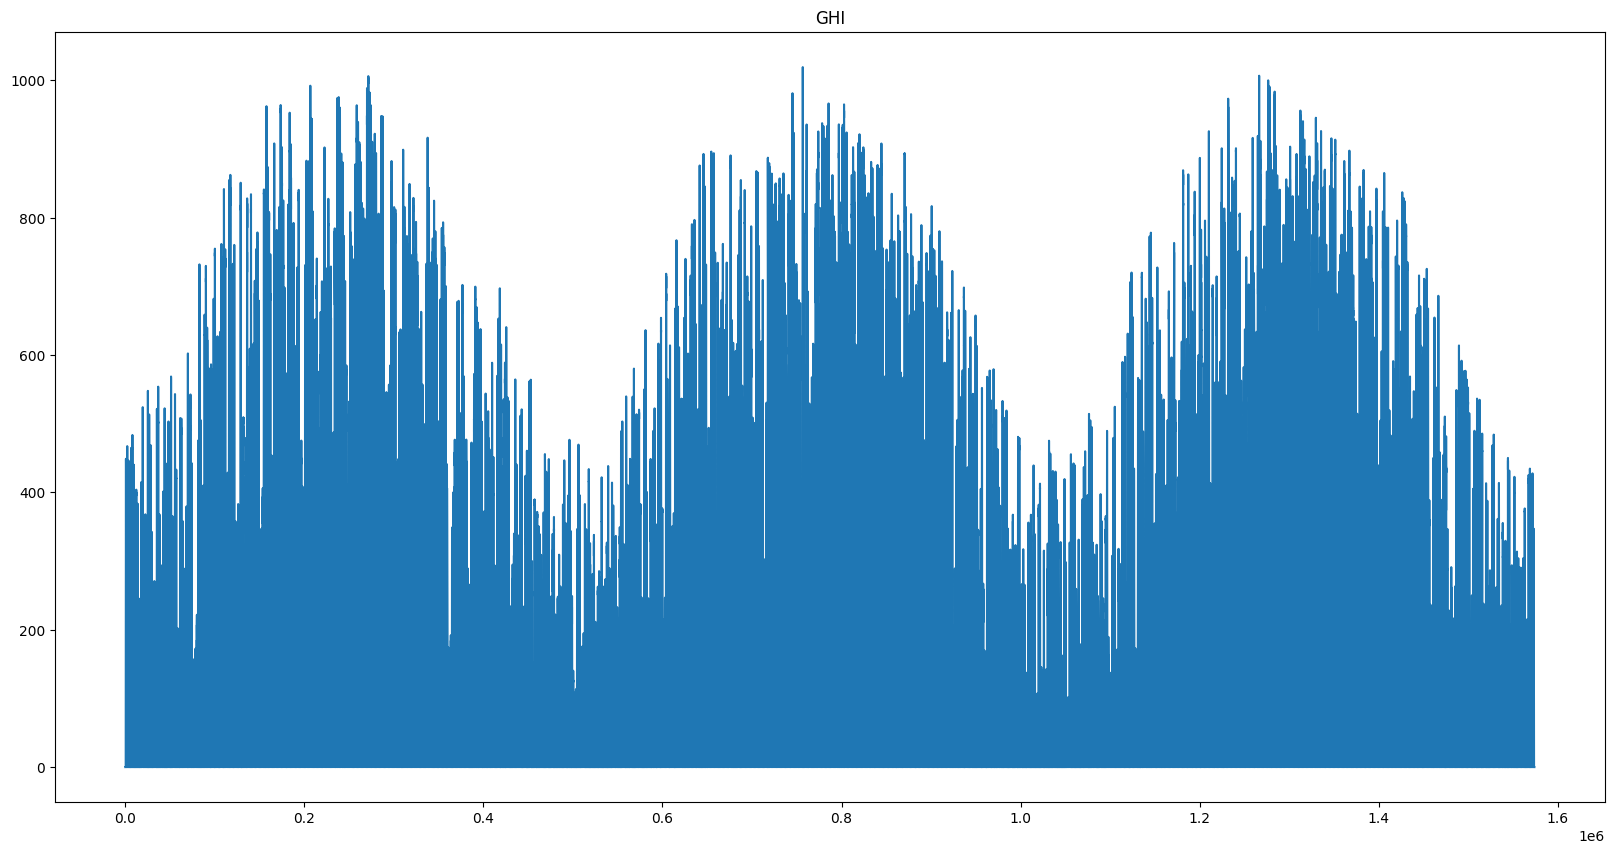

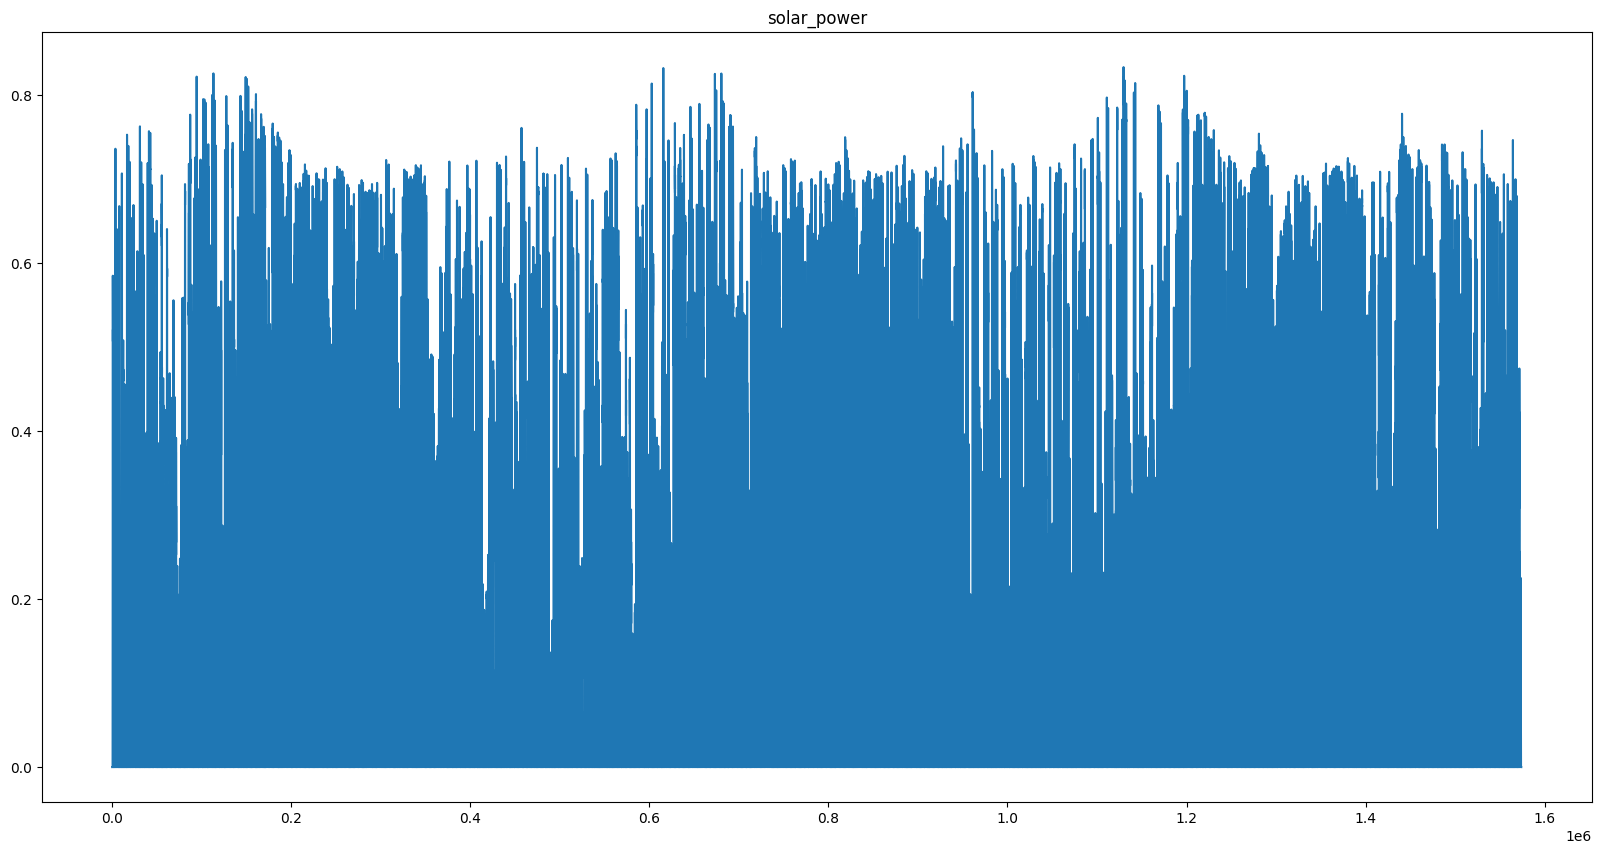

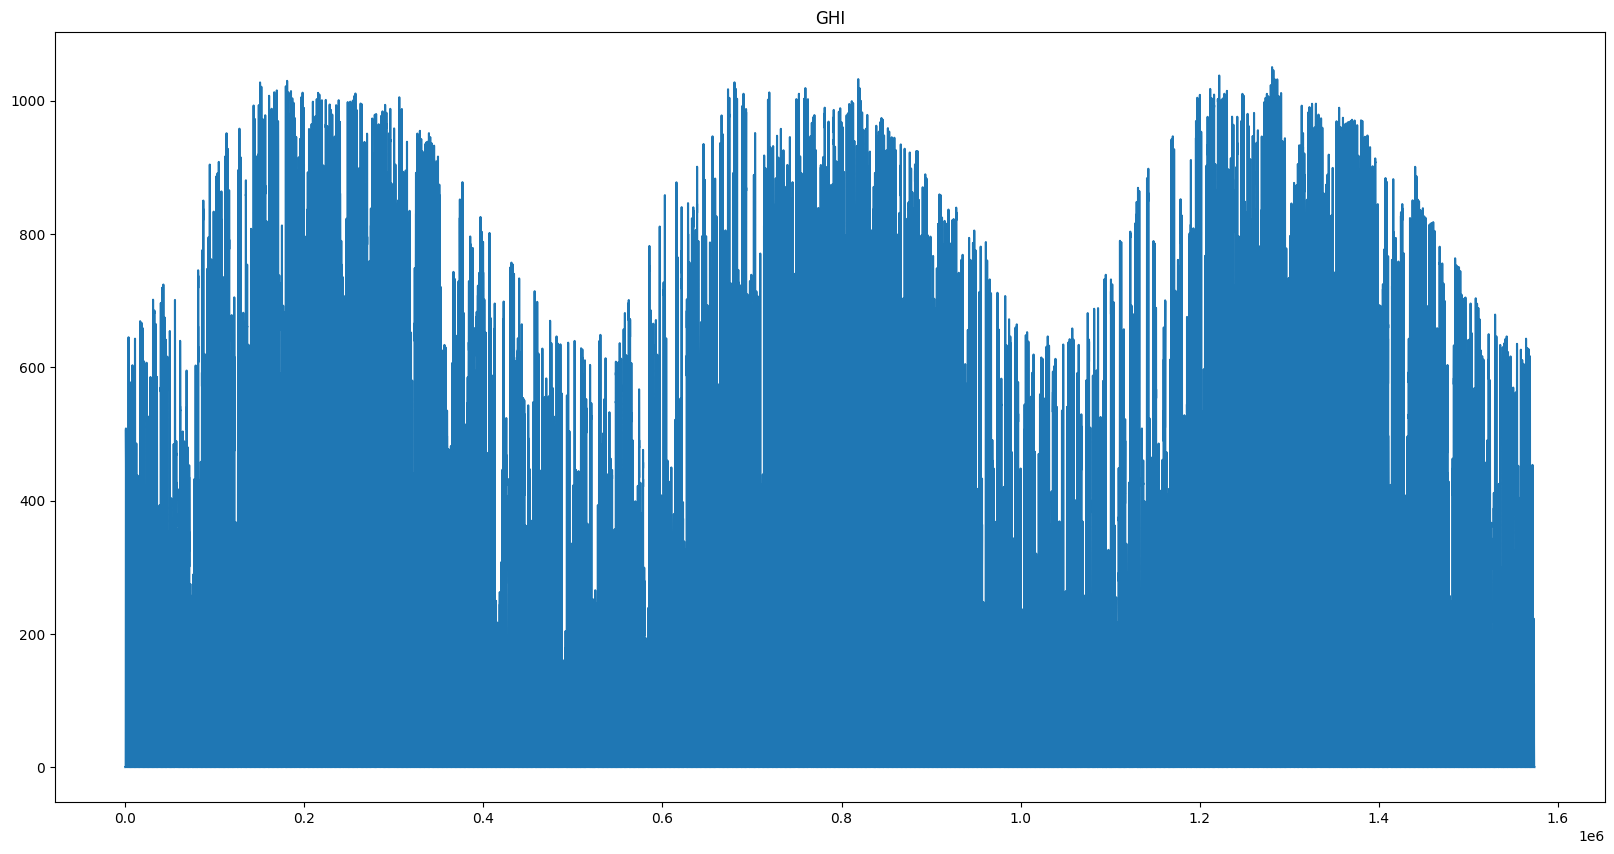

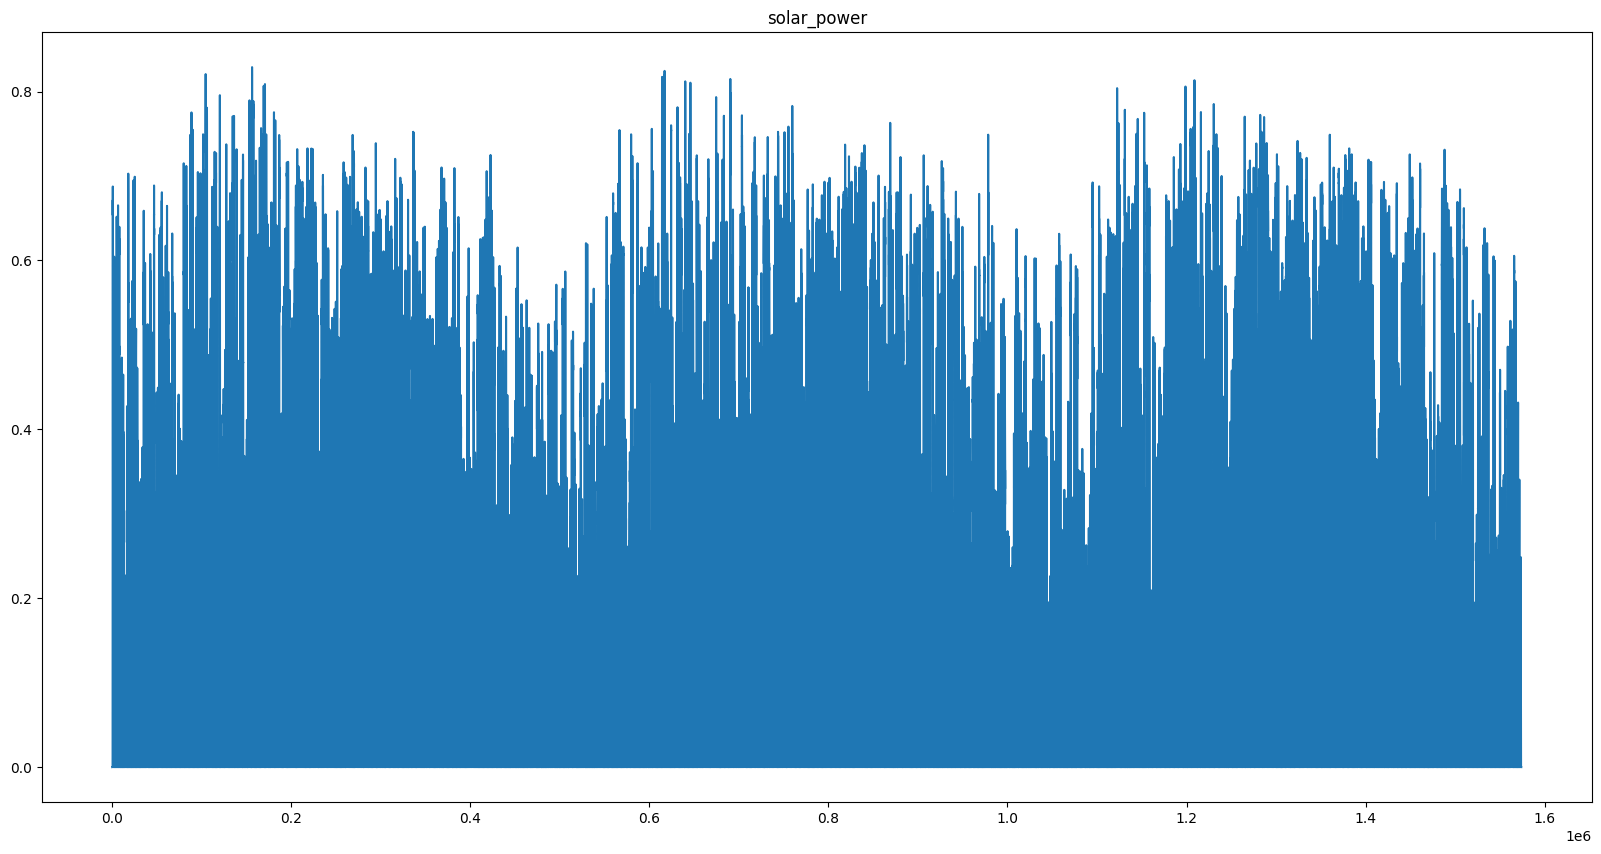

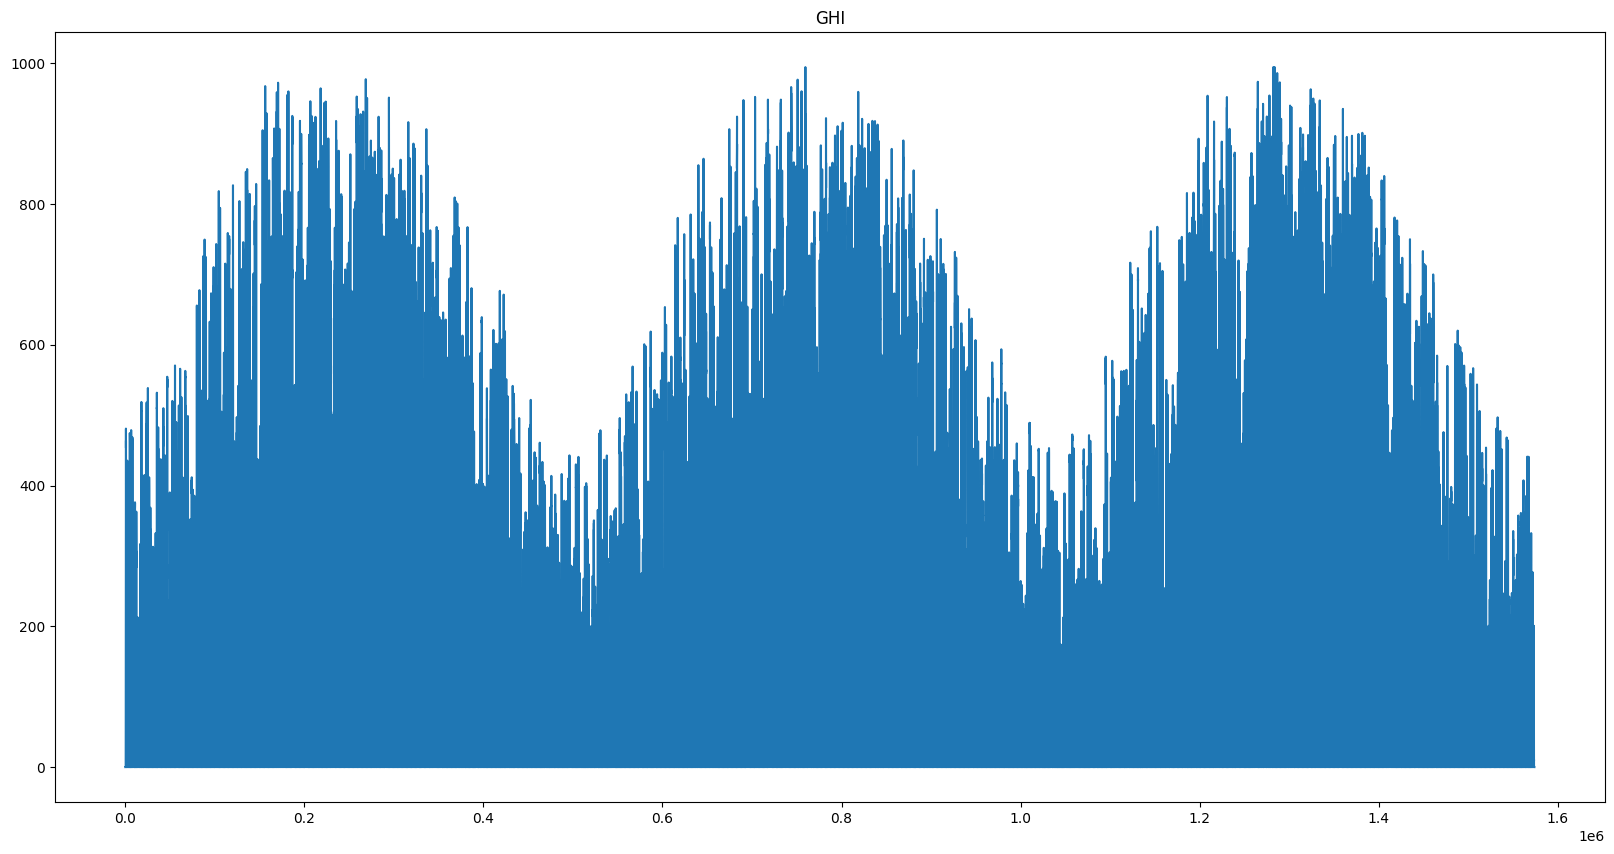

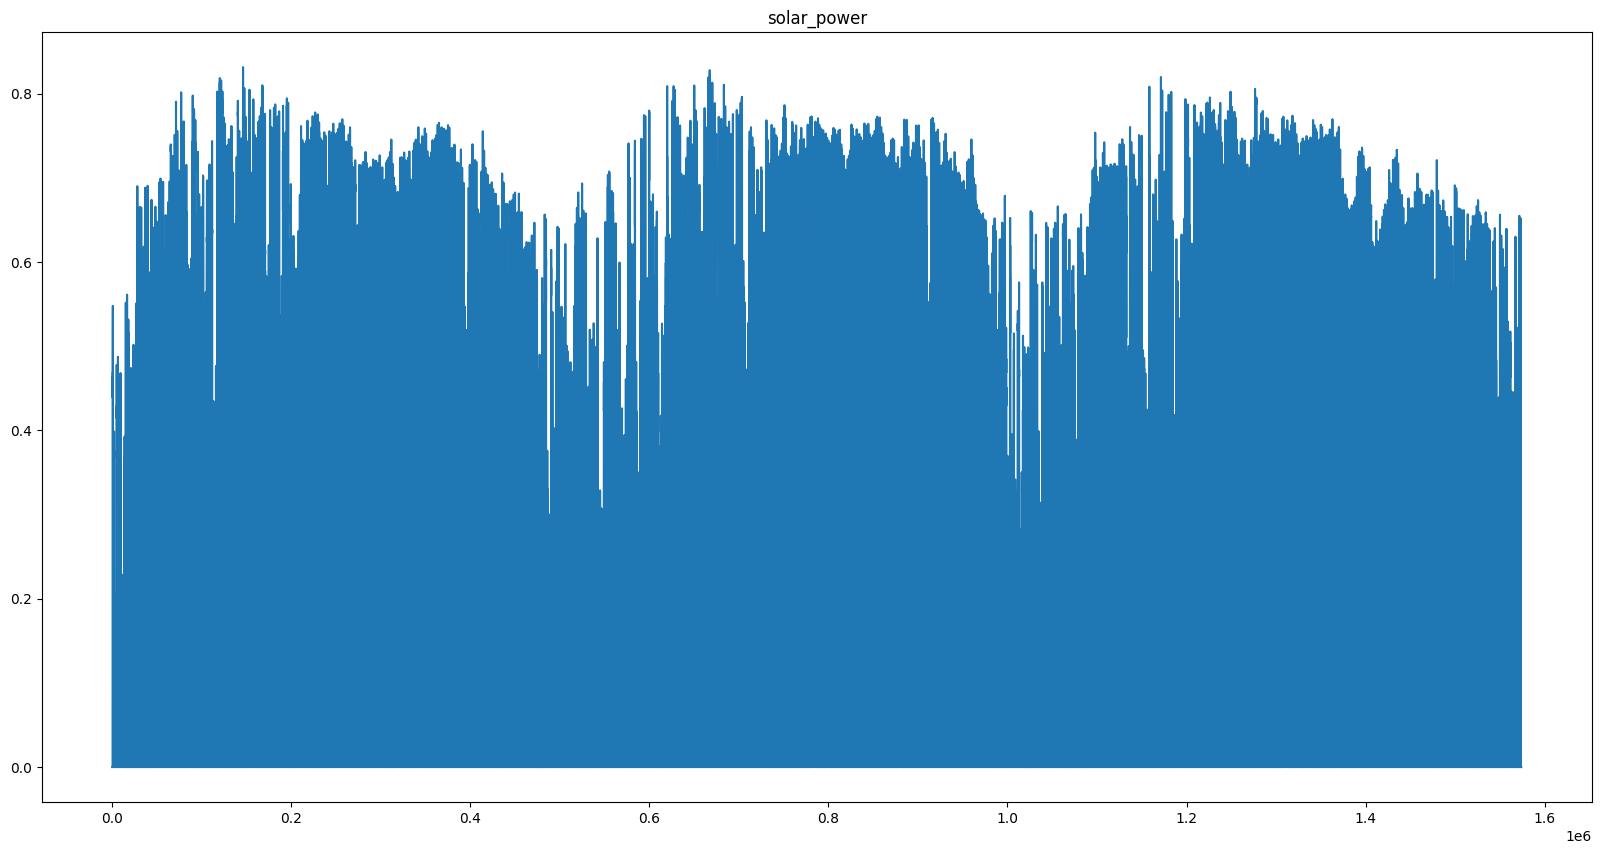

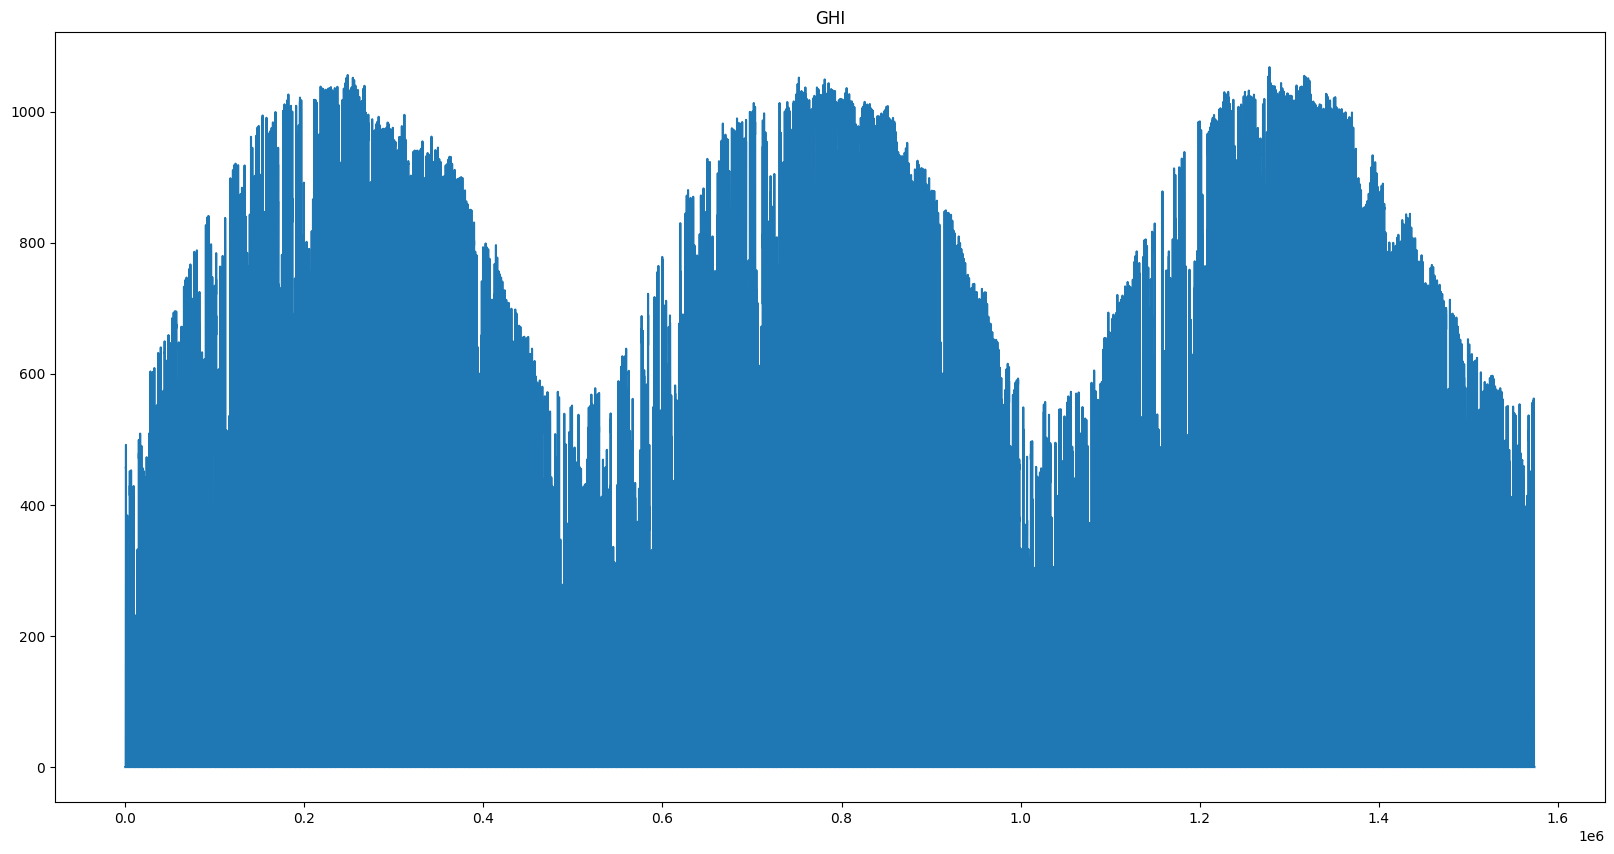

In [28]:
Datasets = [SPP_df, NYISO_df, PJM_df, ERCOT_df, MISO_df, CAISO_df]
DatasetNames = ["SPP", "NYISO", "PJM", "ERCOT", "MISO", "CAISO"]
i = 0
for dataset in Datasets:
    plot_attribute(dataset, attributes, DatasetNames[i])
    i+=1


In [15]:

CAISO_sum_SP = CAISO_mean_df['solar_power'].sum()
print(CAISO_sum_SP)
print(CAISO_total_capacity)

297843.2767212217
12795.400000000001


In [41]:
def sum_attributes_per_interval(df, interval):
    results = []
    for i in range(0, len(df), interval):
    # Calculate the sum of solar_power for the current chunk
        sum_solar_power = df["solar_power"].iloc[i:i+interval].sum()
        sum_GHI = df["GHI"].iloc[i:i+interval].sum()
        
        # Get the final time value in the chunk
        #final_time = df["time"].iloc[min(i+interval, len(df))-1]
        
        # Append the results to the list
        results.append([sum_solar_power, sum_GHI])

    # Convert the list of results to a DataFrame
    #sum_df = pd.DataFrame(results)
    results = np.array(results)
    return results

In [11]:
def chunk(df, interval = 24):
    results = []
    for i in range(0, len(df), interval):
        chunk = df[i:i+interval]
        results.append(chunk)
    results = np.array(results)
    return results

In [12]:
# Number of rows per interval (1440 minutes)
interval = 1440
CAISO_sum_df = sum_attributes_per_interval(CAISO_df, interval)
print(CAISO_sum_df)

[[1.83331380e+02 1.61043750e+05]
 [1.35379660e+02 1.27903750e+05]
 [6.45534603e+01 7.33662500e+04]
 ...
 [2.32531496e+02 1.86837500e+05]
 [2.36759968e+02 1.93687500e+05]
 [0.00000000e+00 0.00000000e+00]]


(26233, 2)
(26233, 1)
(26233, 3)


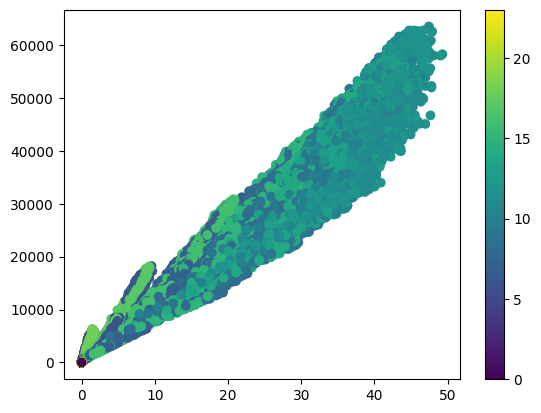

In [13]:
interval = 60
sum_np = sum_attributes_per_interval(CAISO_df, interval)
print(sum_np.shape)
a = np.arange(len(sum_np)).reshape(-1,1)%24
print(a.shape)
sum_np= np.hstack([sum_np, a])
print(sum_np.shape)
plt.scatter(sum_np[:,0], sum_np[:,1], c=sum_np[:,2])
plt.colorbar()

In [15]:
from sklearn.linear_model import LinearRegression

def predict_solar_power(df):

    # Create a Linear Regression model
    model = LinearRegression()

    # Fit the model using the GHI values as the input and solar_power as the target
    model.fit(df[:, :-1, 0], df[:, -1, 1])

    # Predict the solar_power values using the GHI values
    new = model.predict(df[:, :-1, 0])

    return new, model

In [ ]:
def predict_solar_power_from_GHI(df):

    # Create a Linear Regression model
    model = LinearRegression()

    # Fit the model using the GHI values as the input and solar_power as the target
    model.fit(df[:, :-1, 0], df[:, -1, 1])

    # Predict the solar_power values using the GHI values
    new = model.predict(df[:, :-1, 0])

    return new, model

(26208, 25, 3)
(25, 3)


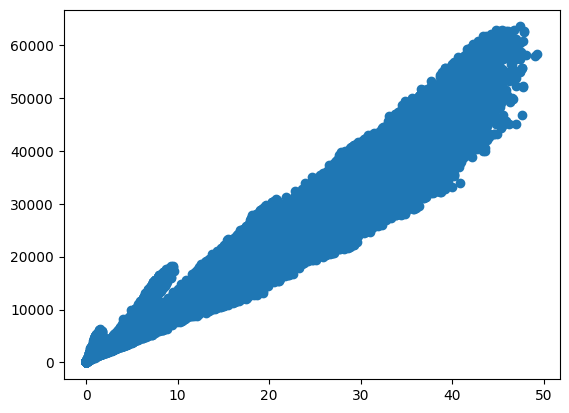

In [26]:
def chunk(df, interval = 25):
    results = []
    for i in range(0, len(df)-interval, 1):
        chunk = df[i:i+interval]
        results.append(chunk)
    results = np.array(results)
    return results

chunked_sum_hour = chunk(sum_np, 25)
plt.scatter(chunked_sum_hour[:, 0, 0], chunked_sum_hour[:, 0, 1])
print(chunked_sum_hour.shape)
print(chunked_sum_hour[-2].shape)

In [27]:
array, model = predict_solar_power(chunked_sum_hour)

(26208,)


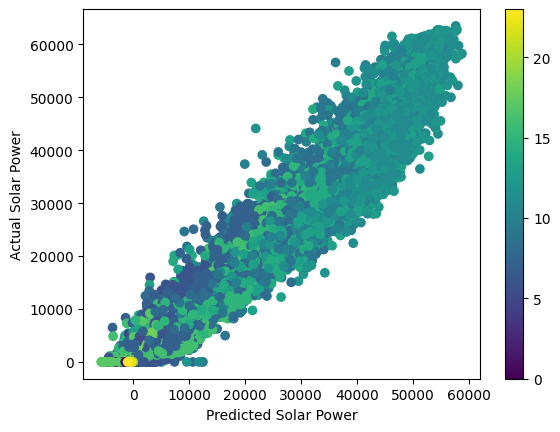

In [28]:
print(array.shape)
plt.scatter(x=array, y=chunked_sum_hour[:, -1, 1],c=chunked_sum_hour[:, -1, 2])
plt.xlabel('Predicted Solar Power')
plt.ylabel('Actual Solar Power')
plt.colorbar()

In [31]:
MSE = np.mean((array - chunked_sum_hour[:, -1, 1])**2)
RMSE = np.sqrt(MSE)
print(MSE)
print(RMSE)

12426685.52599247
3525.150426009147


Mean Squared Error: 0.002227715051571063
R^2 Score: 0.9680842201605969


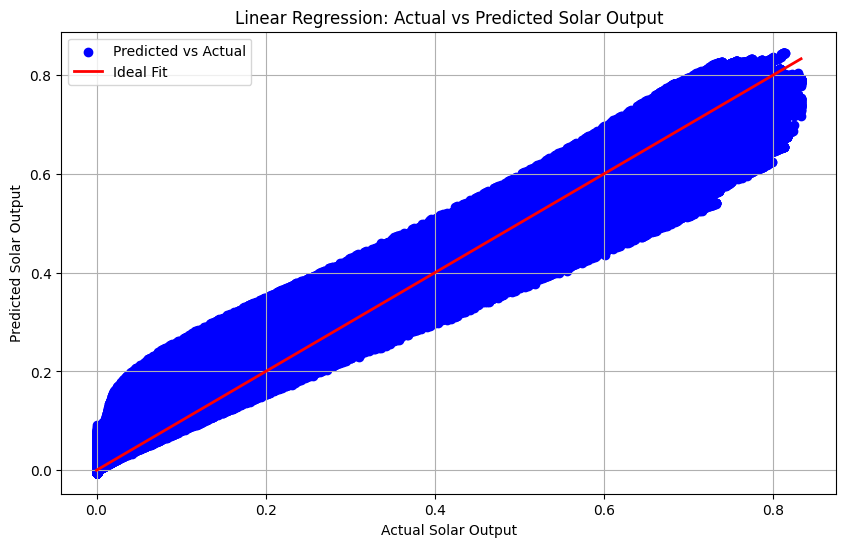

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'weather_path' is the path to your CSV file
weather_path = r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_1_.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(weather_path, delimiter=',')

# Prepare the data
X = data[['GHI', 'DHI', 'DNI']]  # Features: GHI, DHI, DNI
y = data['solar_power']  # Target: solar output

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Solar Output')
plt.ylabel('Predicted Solar Output')
plt.title('Linear Regression: Actual vs Predicted Solar Output')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
NYPath=r'D:\super\Documents\Documents\aiCLub\NYISOData\asos.csv'
NY_data = pd.read_csv(NYPath, delimiter=',')

In [33]:
print(NY_data.head())

  station             valid      lon      lat  elevation    tmpc    dwpc  \
0     ROC  2018-01-01 00:11 -77.6767  43.1167     169.00  -15.00  -16.72   
1     SYR  2018-01-01 00:11 -76.1063  43.1112     124.00  -14.44  -15.56   
2     DKK  2018-01-01 00:13 -79.2720  42.4933     203.00  -11.72  -16.72   
3     JPX  2018-01-01 00:15 -72.2517  40.9594      11.00  -12.22  -20.11   
4     N03  2018-01-01 00:15 -76.2174  42.5929     356.64  -17.00  -19.00   

    relh    drct  sknt  p01m  
0  86.68  270.00  7.00     T  
1  90.42  320.00  5.00     T  
2  66.41  330.00  9.00  0.00  
3  51.84  330.00  9.00  0.00  
4  84.43    0.00  0.00  0.00  


In [35]:
peq_rows = NY_data[NY_data["station"] == "SDC"]

# Print the filtered rows
print(peq_rows.iloc[0])

station                   SDC
valid        2018-01-01 00:35
lon                  -77.1195
lat                   43.2346
elevation              127.86
tmpc                   -14.00
dwpc                   -15.00
relh                    92.12
drct                   250.00
sknt                     6.00
p01m                     0.00
Name: 17, dtype: object


In [45]:
peq_rows = NY_data[NY_data["station"] == "BUF"]

# Print the filtered rows
print(peq_rows.iloc[0])

station                   BUF
valid        2018-01-01 00:54
lon                  -78.7358
lat                   42.9408
elevation               215.0
tmpf                     4.00
tmpc                   -15.56
dwpf                    -2.00
dwpc                   -18.89
relh                    75.92
drct                   250.00
sknt                     5.00
p01m                     0.00
Name: 41, dtype: object


In [31]:
file_paths = [
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_1_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_2_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_3_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_4_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_5_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_6_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_7_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_8_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_9_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_10_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\NYISO_zone_11_.csv'
]

# Read the CSV files into DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]
[print(df.head()) for df in dfs]

                  time  load_power  wind_power  solar_power  DHI  DNI  GHI  \
0  2018-01-01 00:00:00    1.174865    0.002443          0.0  0.0  0.0  0.0   
1  2018-01-01 00:01:00    1.174293    0.002469          0.0  0.0  0.0  0.0   
2  2018-01-01 00:02:00    1.173721    0.002496          0.0  0.0  0.0  0.0   
3  2018-01-01 00:03:00    1.173150    0.002522          0.0  0.0  0.0  0.0   
4  2018-01-01 00:04:00    1.172578    0.002549          0.0  0.0  0.0  0.0   

   Dew Point  Solar Zenith Angle  Wind Speed  Relative Humidity  Temperature  
0      -25.3             160.260         0.7             74.940       -22.10  
1      -25.3             160.252         0.7             75.072       -22.12  
2      -25.3             160.244         0.7             75.204       -22.14  
3      -25.3             160.236         0.7             75.336       -22.16  
4      -25.3             160.228         0.7             75.468       -22.18  
                  time  load_power  wind_power  solar_pow

[None, None, None, None, None, None, None, None, None, None, None]

In [42]:
def sum_attributes_per_interval(df, interval):
    results = []
    for i in range(0, len(df), interval):
    # Calculate the sum of solar_power for the current chunk
        mean_temperature = df["Temperature"].iloc[i:i+interval].mean()
        mean_dew_point = df["Dew Point"].iloc[i:i+interval].mean()

        
        # Get the final time value in the chunk
        #final_time = df["time"].iloc[min(i+interval, len(df))-1]
        
        # Append the results to the list
        results.append([mean_temperature, mean_dew_point])

    # Convert the list of results to a DataFrame
    #sum_df = pd.DataFrame(results)
    results = np.array(results)
    print(results[0:5])
    return results

In [43]:
for df in dfs:
    sum_attributes_per_interval(df, 60)

[[-22.35833333 -25.525     ]
 [-22.72666667 -25.89      ]
 [-23.01       -26.135     ]
 [-23.22833333 -26.345     ]
 [-23.39       -26.49      ]]
[[-13.85333333 -16.59      ]
 [-14.015      -16.835     ]
 [-14.44       -17.315     ]
 [-14.91       -17.88      ]
 [-14.94       -18.055     ]]
[[-15.57       -18.3       ]
 [-15.74       -18.3       ]
 [-15.915      -18.39      ]
 [-16.10666667 -18.545     ]
 [-16.34333333 -18.645     ]]
[[-13.77166667 -15.38      ]
 [-14.12666667 -15.78      ]
 [-14.3        -16.045     ]
 [-14.3        -16.1       ]
 [-14.435      -16.19      ]]
[[-15.25333333 -19.9       ]
 [-15.46       -19.99      ]
 [-15.83       -20.28      ]
 [-16.135      -20.635     ]
 [-16.41       -20.89      ]]
[[-12.15333333 -12.6       ]
 [-12.245      -12.6       ]
 [-12.38166667 -12.645     ]
 [-12.55333333 -12.7       ]
 [-12.715      -12.745     ]]
[[-17.95166667 -20.135     ]
 [-18.19833333 -20.39      ]
 [-18.35333333 -20.59      ]
 [-18.47833333 -20.745     ]
 [-18.43